# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# Establishing url and query url for API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}q={city}&APPID={weather_api_key}&units={units}"

# Set record count and set count so that we have a starting point
# for counting records in groups (sets) of 50
record_count = 1
set_count = 1

# Print header for log
print("Beginning Data Retrieval")
print("------------------------")

# Number the cities list and loop through until record count reaches
# 50, then restart record count. 
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Make API call and print call information
    query_url
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add one to record count before looping back
    record_count += 1
    
    # Set timer so as not to make more requests per minute than allotted by API
    time.sleep(1)

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ardabil
Processing Record 3 of Set 1 | huarmey
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | slave lake
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mys shmidta
Processing Record 9 of Set 1 | illoqqortoormiut
Processing Record 10 of Set 1 | taolanaro
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | conceicao da barra
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | okhotsk
Processing Record 18 of Set 1 | gerede
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | belushya guba
Processing Record 22 of Set 1 | cape coast
Processing Record 23 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
# Set empty lists for creating dataframe
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

# Loop through city names and get weather data for each one
for city in cities:
    try:
        weather_response = requests.get(f"{url}q={city}&APPID={weather_api_key}&units={units}").json()
        
        name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
    
    # Skip city entries with no data
    except (KeyError, IndexError):
        pass    
    
    # Set timer so as not to make more requests per minute than allotted by API
    time.sleep(1)

# Create dictionary to convert to dataframe
cities_weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

# Create dataframe from dict
cities_weather = pd.DataFrame(cities_weather_dict)

# Display weather dataframe
cities_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,60.80,82,11,4.61,ZA,1612400046
1,Ardabil,38.2498,48.2933,36.86,68,48,9.80,IR,1612400047
2,Huarmey,-10.0681,-78.1522,70.41,78,72,7.09,PE,1612399761
3,Lebu,-37.6167,-73.6500,58.12,89,0,11.83,CL,1612400049
4,Slave Lake,55.2834,-114.7690,-4.00,77,90,5.75,CA,1612400050


In [42]:
cities_weather.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [43]:
cities_weather.to_csv('cities_weather.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
# Find rows in which 'Humidity' is > 100% 
humidity_check = cities_weather.apply(lambda x : True
            if x['Humidity'] > 100 else False, axis = 1) 
  
# Count number of True in the series 
humid_num = len(humidity_check[humidity_check == True].index) 

# Print result
print('Number of cities with humidity greater than 100%: ', humid_num ) 

Number of cities with humidity greater than 100%:  0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

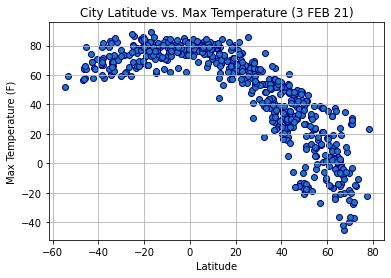

In [49]:
# Set x and y values for scatter plot
x_values = cities_weather["Lat"]
y_values = cities_weather["Max Temp"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values,y_values, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Latitude vs. Humidity Plot

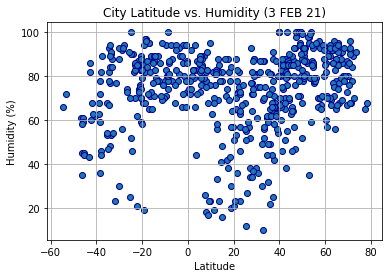

In [50]:
# Set x and y values for scatter plot
x_values = cities_weather["Lat"]
y_values = cities_weather["Humidity"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values,y_values, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Latitude vs. Cloudiness Plot

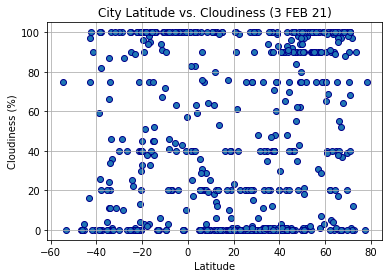

In [51]:
# Set x and y values for scatter plot
x_values = cities_weather["Lat"]
y_values = cities_weather["Cloudiness"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values,y_values, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Latitude vs. Wind Speed Plot

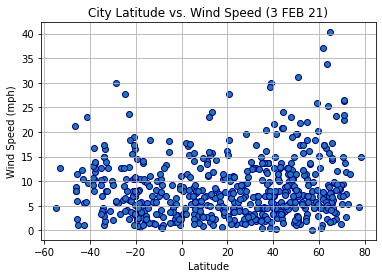

In [52]:
# Set x and y values for scatter plot
x_values = cities_weather["Lat"]
y_values = cities_weather["Wind Speed"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values,y_values, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression